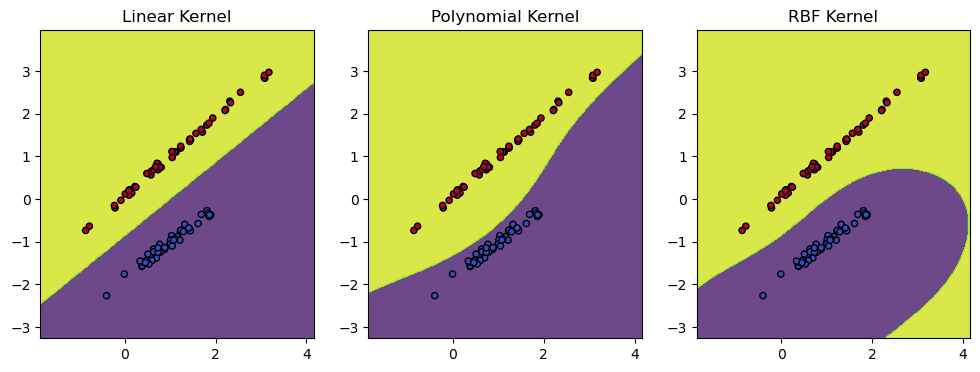

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Step 1: Load Dataset 1
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_informative=2, n_redundant=0, random_state=42)

# Step 2: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train three different SVM classifiers
svm_linear = SVC(kernel='linear' )
svm_poly = SVC(kernel='poly', degree=3)  # Using polynomial kernel of degree 3
svm_rbf = SVC(kernel='rbf')  # Using RBF kernel

# Fit the classifiers
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)

# Step 4: Plot the decision boundaries
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

plt.figure(figsize=(12, 4))

# Plot decision boundary for linear kernel
plt.subplot(1, 3, 1)
Z = svm_linear.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Linear Kernel')

# Plot decision boundary for polynomial kernel
plt.subplot(1, 3, 2)
Z = svm_poly.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('Polynomial Kernel')

# Plot decision boundary for RBF kernel
plt.subplot(1, 3, 3)
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
plt.title('RBF Kernel')

plt.show()


In [3]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report

# Generate some sample data
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM with linear kernel
svm_linear = SVC(kernel='linear')
param_grid_linear = {'C': [0.1, 1, 10, 100]}  # Hyperparameters to tune
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5)
grid_search_linear.fit(X_train, y_train)

# SVM with kernel (e.g., RBF kernel)
svm_kernel = SVC(kernel='rbf')
param_grid_kernel = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # Hyperparameters to tune
grid_search_kernel = GridSearchCV(svm_kernel, param_grid_kernel, cv=5)
grid_search_kernel.fit(X_train, y_train)

# Best hyperparameters
best_params_linear = grid_search_linear.best_params_
best_params_kernel = grid_search_kernel.best_params_

# Evaluate linear SVM
svm_linear_best = grid_search_linear.best_estimator_
y_pred_linear = svm_linear_best.predict(X_test)
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))

# Evaluate kernel SVM
svm_kernel_best = grid_search_kernel.best_estimator_
y_pred_kernel = svm_kernel_best.predict(X_test)
print("Kernel SVM Classification Report:")
print(classification_report(y_test, y_pred_kernel))


Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88        93
           1       0.94      0.83      0.88       107

    accuracy                           0.88       200
   macro avg       0.88      0.88      0.88       200
weighted avg       0.89      0.88      0.88       200

Kernel SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        93
           1       0.91      0.80      0.86       107

    accuracy                           0.85       200
   macro avg       0.86      0.86      0.85       200
weighted avg       0.86      0.85      0.86       200



In [1]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Linear SVM
svm_linear = SVC(kernel='linear')
param_grid_linear = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
svm_linear_cv = GridSearchCV(svm_linear, param_grid_linear, cv=5)
svm_linear_cv.fit(X_train, y_train)
print("Best Parameters for Linear SVM:", svm_linear_cv.best_params_)

# Kernelized SVM (e.g., RBF kernel)
svm_kernel = SVC(kernel='rbf')
param_grid_kernel = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
svm_kernel_cv = GridSearchCV(svm_kernel, param_grid_kernel, cv=5)
svm_kernel_cv.fit(X_train, y_train)
print("Best Parameters for Kernelized SVM:", svm_kernel_cv.best_params_)


NameError: name 'X_train' is not defined